In [1]:
%pylab inline
import sys
sys.path.append('../src/')
import io_snaps
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path = '/home/xzk/work/github/MW_anisotropy/code/test_snaps/'
snap1 = 'MWLMC3_100M_new_b1_091'
snap2 = 'MWLMC4_100M_new_b0_114'
snap3 = 'MWLMC5_100M_new_b1_110'
snap4 = 'MWLMC6_2_100M_new_b0_111'

satellite1 = io_snaps.read_snap_coordinates(path, snap1, 100000000, 'sat', 'sat')
satellite2 = io_snaps.read_snap_coordinates(path, snap2, 100000000, 'sat', 'sat')
satellite3 = io_snaps.read_snap_coordinates(path, snap3, 100000000, 'sat', 'sat')
satellite4 = io_snaps.read_snap_coordinates(path, snap4, 100000000, 'sat', 'sat')

Loading snapshot: /home/xzk/work/github/MW_anisotropy/code/test_snaps/MWLMC3_100M_new_b1_091
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Potential
Returning DM    Mass
Loading MW particles and LMC particles
Loading satellite particles
Computing coordinates in the satellite COM frame
[-1.15180225 -8.44060337  1.20941471] 3
(array([-1.15180225, -8.44060337,  1.20941471]), array([ -7.95330885, -27.41035311,  49.39891543]))
(array([  8.71015261,   8.37214876, -38.94851037]), array([ -39.28462271, -226.04422189,  129.81984902]))
(array([ -2.66247101, -18.90588227,   4.80477761]), array([ -4.01405486, -14.18540821,  20.29693272]))
(array([-1.15180225, -8.44060337,  1.20941471]), array([ -7.95330885, -27.41035311,  49.39891543]))
(array([ 4.68540094e-08, -1.11278272e-07, -9.51722066e-09]), array([-1.33241089e-07,  1.81559286e-07,  1.38609778e-06]))
[  4.8958794  -18.97433699 -32.93431806] [ -51.25198656 -267.63998303  199.51569856]
[  4.89

In [3]:
pos_satellite1 = satellite1[0]
mass_satellite1 = satellite1[3]

pos_satellite2 = satellite2[0]
mass_satellite2 = satellite2[3]

pos_satellite3 = satellite3[0]
mass_satellite3 = satellite3[3]

pos_satellite4 = satellite4[0]
mass_satellite4 = satellite4[3]

In [4]:
def scatter_plot(pos, npart):
    npart_rand = np.random.randint(0, len(pos), npart)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(pos[npart_rand, 0], pos[npart_rand, 1], c='k', s=1)
    ax[1].scatter(pos[npart_rand, 1], pos[npart_rand, 2], c='k', s=1)
    ax[0].scatter(0,0, c='r', s=60)
    ax[1].scatter(0,0, c='r', s=60)
    ax[0].set_xlim(-50, 50)
    ax[0].set_ylim(-50, 50)
    ax[1].set_xlim(-50, 50)
    ax[1].set_ylim(-50, 50)

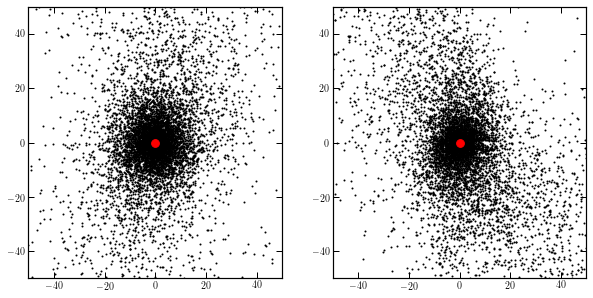

In [5]:
scatter_plot(pos_satellite1, 10000)

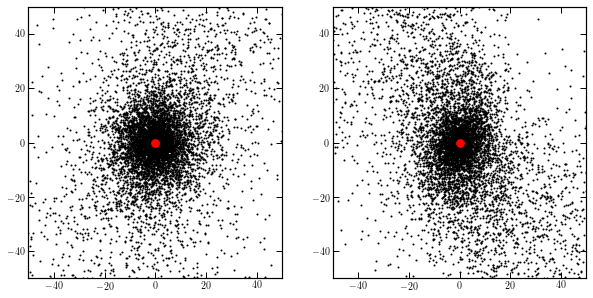

In [6]:
scatter_plot(pos_satellite2, 10000)

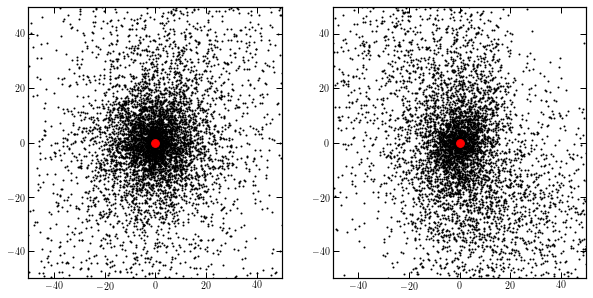

In [7]:
scatter_plot(pos_satellite3, 10000)

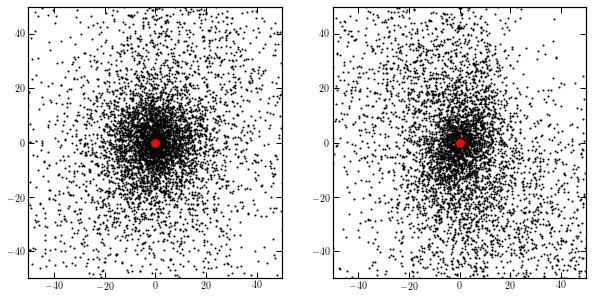

In [8]:
scatter_plot(pos_satellite4, 10000)

In [9]:
def enclosed_mass(pos, m):
    r = np.sqrt(np.sum(pos**2, axis=1))
    r_bins = np.arange(0, 30, 1)
    dr = (r_bins[1]-r_bins[0])/2.
    nbins = len(r_bins)
    rho = np.zeros(nbins-1)
    m_tot = np.zeros(nbins)
    m_cumulative = np.zeros(nbins)
    for i in range(nbins-1):
        index = np.where((r<r_bins[i+1]) & (r>=r_bins[i]))[0]
        m_shell = np.sum(m[index])
        v = 4/3. * np.pi * (r_bins[i+1]**3 - r_bins[i]**3)
        rho[i] = m_shell/v
        m_tot[i] = m_shell
        m_cumulative[i] = np.sum(m_tot[:i+1])
    return rho, r_bins[:-1] + dr, m_tot[:-1], m_cumulative[:-1]
        

In [10]:
def hernquist_mass_rf(a, r, M, mencl):
    return mencl-M*r**2. / (r+a)**2.

def hernquist_mass(r, M, a):
    return M*r**2. / (r+a)**2.


def hernquist_rho(r, m, a):
    return m*a / (2.*np.pi*r*(r+a)**3.)

In [25]:
def find_scale_length(pos, mass, rs_max):
    rho, r, m, m_c = enclosed_mass(pos, mass)
    M = np.sum(mass)
    r_peak = 2*r[np.argmax(m)]
    r_encl = np.argmin(np.abs(r-r_peak))
    rs_opt = optimize.root_scalar(hernquist_mass_rf, args=(r[r_encl], M, m_c[r_encl]), bracket=[0,rs_max], method='bisect')
    return (rs_opt.root)

In [26]:
rho1, r1, m1, m_c1 = enclosed_mass(pos_satellite1, mass_satellite1)
rho2, r2, m2, m_c2 = enclosed_mass(pos_satellite2, mass_satellite2)
rho3, r3, m3, m_c3 = enclosed_mass(pos_satellite3, mass_satellite3)
rho4, r4, m4, m_c4 = enclosed_mass(pos_satellite4, mass_satellite4)

In [27]:
rs_opt1 = find_scale_length(pos_satellite1, mass_satellite1, 30)
rs_opt2 = find_scale_length(pos_satellite2, mass_satellite2, 30)
rs_opt3 = find_scale_length(pos_satellite3, mass_satellite3, 30)
rs_opt4 = find_scale_length(pos_satellite4, mass_satellite4, 30)

In [28]:
print(rs_opt1, rs_opt2, rs_opt3, rs_opt4)

9.733491859209948 11.824306266278768 19.40474324270042 23.772800898071296


In [21]:
m_hern1 = hernquist_mass(r1, np.sum(mass_satellite1), rs_opt1)
m_hern2 = hernquist_mass(r2, np.sum(mass_satellite2), rs_opt2)
m_hern3 = hernquist_mass(r3, np.sum(mass_satellite3), rs_opt3)
m_hern4 = hernquist_mass(r4, np.sum(mass_satellite4), rs_opt4)

rho_hern1 = hernquist_rho(r1, np.sum(mass_satellite1), rs_opt1)
rho_hern2 = hernquist_rho(r2, np.sum(mass_satellite2), rs_opt2)
rho_hern3 = hernquist_rho(r3, np.sum(mass_satellite3), rs_opt3)
rho_hern4 = hernquist_rho(r4, np.sum(mass_satellite4), rs_opt4)

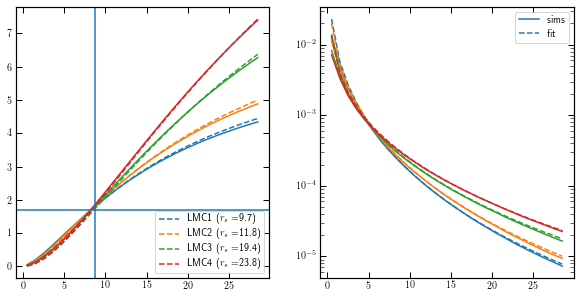

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(r1, m_c1, c='C0')
ax[0].plot(r1, m_hern1, c='C0', ls='--', label='LMC1 ($r_s=${:.1f})'.format(rs_opt1))

ax[0].plot(r2, m_c2, c='C1')
ax[0].plot(r2, m_hern2, c='C1', ls='--', label='LMC2 ($r_s=${:.1f})'.format(rs_opt2))

ax[0].plot(r3, m_c3, c='C2')
ax[0].plot(r3, m_hern3, c='C2', ls='--', label='LMC3 ($r_s=${:.1f})'.format(rs_opt3))

ax[0].plot(r4, m_c4, c='C3')
ax[0].plot(r4, m_hern4, c='C3', ls='--', label='LMC4 ($r_s=${:.1f})'.format(rs_opt4))

ax[1].semilogy(r1, rho1 , c='C0', label='sims')
ax[1].semilogy(r1, rho_hern1, c='C0', ls='--', label='fit')

ax[1].semilogy(r2, rho2, c='C1')
ax[1].semilogy(r2, rho_hern2, c='C1', ls='--')

ax[1].semilogy(r3, rho3, c='C2')
ax[1].semilogy(r3, rho_hern3, c='C2', ls='--')

ax[1].semilogy(r4, rho4, c='C3')
ax[1].semilogy(r4, rho_hern4, c='C3', ls='--')

ax[1].legend()
ax[0].legend()

ax[0].axvline(8.7)
ax[0].axhline(1.7)

